# Singature Verification

In [31]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt

from PIL import Image, ImageChops  # PIL is one of the important modules for image processing in Python.
import cv2

## Data Acquisition

In [ ]:
# !wget http://www.iapr-tc11.org/dataset/ICDAR_SignatureVerification/SigComp2011/sigComp2011-trainingSet.zip

In [42]:
genuine_dir = '../data/trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine'
forgery_dir = '../data/trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Forgeries'
genuine_list = os.listdir(genuine_dir)
forgery_list = os.listdir(forgeries_dir)

In [26]:
genuine_list.sort(key=str.lower)
for fn in genuine_list:
    print(fn)

001_1.png
001_10.png
001_11.png
001_12.png
001_13.png
001_14.png
001_15.png
001_16.png
001_17.png
001_18.png
001_19.png
001_2.png
001_20.png
001_21.png
001_22.png
001_23.png
001_24.png
001_3.png
001_4.png
001_5.png
001_6.png
001_7.png
001_8.png
001_9.png
002_1.png
002_10.png
002_11.png
002_12.png
002_13.png
002_14.png
002_15.png
002_16.png
002_17.png
002_18.png
002_19.png
002_2.png
002_20.png
002_21.png
002_22.png
002_23.png
002_24.png
002_3.png
002_4.png
002_5.png
002_6.png
002_7.png
002_8.png
002_9.png
003_1.png
003_10.png
003_11.png
003_12.png
003_13.png
003_14.png
003_15.png
003_16.png
003_17.png
003_18.png
003_19.png
003_2.png
003_20.png
003_21.png
003_22.png
003_23.png
003_24.png
003_3.png
003_4.png
003_5.png
003_6.png
003_7.png
003_8.png
003_9.png
004_1.png
004_10.png
004_11.png
004_12.png
004_13.png
004_14.png
004_15.png
004_16.png
004_17.png
004_18.png
004_19.png
004_2.png
004_20.png
004_21.png
004_22.png
004_23.png
004_24.png
004_3.png
004_4.png
004_5.png
004_6.png
004_7.png


In [27]:
def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

In [38]:
# Get Offline Genuine data and labels
genuine_data = []
genuine_label = []

for fn in genuine_list:
    
    img = Image.open(os.path.join(genuine_dir, fn), 'r')
    img_arr = np.array(trim(img))
    
    # Covert image to cv2
    img = cv2.cvtColor(img_arr, cv2.COLOR_RGB2BGR)

    # get the dimention
    height, width, depth = img.shape
    
    # crop the image
    crop_img = img[30:height-30, 30:width-30]
    
    #get dimension after cropping
    height, width, depth = crop_img.shape 
    
    img_padded = cv2.copyMakeBorder(crop_img,
                                    (350-(height-int(height/2))), (350-int(height/2)), (550-int(width/2)), (550-(width-int(width/2))),
                                    cv2.BORDER_CONSTANT, value = [255,255,255])
    crop_img_final = img_padded[200:600, 100:900]
    
    genuine_data.append(crop_img_final)
    genuine_label.append(fn)    

In [36]:
genuine_data

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [253, 254, 254]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [253, 253, 253]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [37]:
genuine_label

['001_1.png',
 '001_10.png',
 '001_11.png',
 '001_12.png',
 '001_13.png',
 '001_14.png',
 '001_15.png',
 '001_16.png',
 '001_17.png',
 '001_18.png',
 '001_19.png',
 '001_2.png',
 '001_20.png',
 '001_21.png',
 '001_22.png',
 '001_23.png',
 '001_24.png',
 '001_3.png',
 '001_4.png',
 '001_5.png',
 '001_6.png',
 '001_7.png',
 '001_8.png',
 '001_9.png',
 '002_1.png',
 '002_10.png',
 '002_11.png',
 '002_12.png',
 '002_13.png',
 '002_14.png',
 '002_15.png',
 '002_16.png',
 '002_17.png',
 '002_18.png',
 '002_19.png',
 '002_2.png',
 '002_20.png',
 '002_21.png',
 '002_22.png',
 '002_23.png',
 '002_24.png',
 '002_3.png',
 '002_4.png',
 '002_5.png',
 '002_6.png',
 '002_7.png',
 '002_8.png',
 '002_9.png',
 '003_1.png',
 '003_10.png',
 '003_11.png',
 '003_12.png',
 '003_13.png',
 '003_14.png',
 '003_15.png',
 '003_16.png',
 '003_17.png',
 '003_18.png',
 '003_19.png',
 '003_2.png',
 '003_20.png',
 '003_21.png',
 '003_22.png',
 '003_23.png',
 '003_24.png',
 '003_3.png',
 '003_4.png',
 '003_5.png',
 '0

In [43]:
# Get Offline Forgery data and labels
forgery_data = []
forgery_label = []

for fn in forgery_list:
    
    img = Image.open(os.path.join(forgery_dir, fn), 'r')
    img_arr = np.array(trim(img))
    
    # Covert image to cv2
    img = cv2.cvtColor(img_arr, cv2.COLOR_RGB2BGR)

    # get the dimention
    height, width, depth = img.shape
    
    # crop the image
    crop_img = img[30:height-30, 30:width-30]
    
    #get dimension after cropping
    height, width, depth = crop_img.shape 
    
    img_padded = cv2.copyMakeBorder(crop_img,
                                    (350-(height-int(height/2))), (350-int(height/2)), (550-int(width/2)), (550-(width-int(width/2))),
                                    cv2.BORDER_CONSTANT, value = [255,255,255])
    crop_img_final = img_padded[200:600, 100:900]
    
    forgery_data.append(crop_img_final)
    forgery_label.append(fn) 

In [44]:
forgery_data

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [254, 255, 255],
         [254, 255, 254],
         [254, 254, 254]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [254, 254, 255],
         [254, 255, 255],
         [254, 254, 254]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [254, 254, 254],
         [254, 255, 255],
         [254, 254, 254]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [45]:
forgery_label

['0113006_8.png',
 '0111010_11.png',
 '0111010_9.png',
 '0109004_10.png',
 '0110005_5.png',
 '0109007_8.png',
 '0101004_6.png',
 '0116002_6.png',
 '0110009_8.png',
 '0113003_12.png',
 '0110009_9.png',
 '0116002_7.png',
 '0101004_7.png',
 '0109007_9.png',
 '0110005_4.png',
 '0109004_11.png',
 '0111010_8.png',
 '0113006_9.png',
 '0111010_10.png',
 '0111010_12.png',
 '0112004_9.png',
 '0110005_6.png',
 '0109005_9.png',
 '0101004_5.png',
 '0116002_5.png',
 '0113003_11.png',
 '0113003_10.png',
 '0116002_4.png',
 '0101004_4.png',
 '0109005_8.png',
 '0110005_7.png',
 '0109004_12.png',
 '0112004_8.png',
 '0113001_11.png',
 '0109001_8.png',
 '0110005_3.png',
 '0116008_12.png',
 '0104006_8.png',
 '0103002_10.png',
 '0103002_11.png',
 '0104006_9.png',
 '0116002_1.png',
 '0101004_1.png',
 '0109006_12.png',
 '0110005_2.png',
 '0104006_11.png',
 '0109001_9.png',
 '0113001_10.png',
 '0109003_9.png',
 '0113001_12.png',
 '0116008_8.png',
 '0109006_10.png',
 '0101004_3.png',
 '0116002_3.png',
 '0116008_

In [48]:
# convert them into ndarray
genuine_signature = np.array(genuine_data)
forgery_signature = np.array(forgery_data)
genuine_label = np.array(genuine_label)
forgery_label = np.array(forgery_label)

In [51]:
genuine_signature.shape, genuine_label.shape, forgery_signature.shape, forgery_label.shape

((235, 400, 800, 3), (235,), (340, 400, 800, 3), (340,))

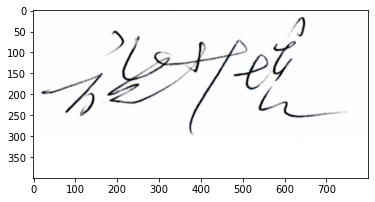

In [66]:
plt.imshow(np.uint8(genuine_signature[100]))
plt.show()

In [69]:
x_train = np.concatenate((genuine_signature, forgery_signature))
y_train = np.concatenate((genuine_label, forgery_label))

In [70]:
x_train.shape, y_train.shape

((575, 400, 800, 3), (575,))

In [71]:
x_train = x_train.transpose((0, 3, 1, 2))

In [ ]:
x_train.shape